# Housing Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from FormatScripts import hello

pd.options.display.max_columns = None
%matplotlib inline

## Functions used

In [2]:
def string(x):
    return str(x)

In [3]:
def add_unit(x):
    if x != 0:
        return ' ' + str(x)
    else:
        return ''

def lower(x):
    return x.lower()

def roound(x):
    if isinstance(x,str)==True:
        return x
    else:
        return round(x)

In [4]:
def abr_suf(x):
    if x == 'Street':
        return ' st'
    elif x == 'Avenue':
        return ' ave'
    elif x == 'Boulevard':
        return ' blvd'
    elif x == 'Drive':
        return ' dr'
    elif x == 'Way':
        return ' wy'
    elif x == 'Place' or x == 'place':
        return ' pl'
    elif x == 'Lane':
        return ' ln'
    elif x == 'Court':
        return ' ct'
    elif x == 'Parkway':
        return ' pkwy'
    elif x == 'Road':
        return ' rd'
    else:
        return ''

In [5]:
def prop_type_update(x):
    if x == 'Duplex' or x == 'Triplex' or x == 'Duadruplex':
        return 'Multi'
    elif x == 'Studio' or x == 'Loft' or x == 'Condominium':
        return 'Condominium'
    elif x == 'Townhouse':
        return 'Townhouse'
    else:
        return 'Single Family Residence'

In [6]:
def yn_impute(x):
    if x == True:
        return 1
    else:
        return 0
    
def impute_features(df, feature_list):
    for feature in feature_list:
        df[feature] = df[feature].apply(yn_impute)

In [7]:
def wall_clean(x):
    if x == 'No Common Walls' or x == 'End Unit' or x == 'End Unit, No Common Walls' or x == 'No Common Walls, End Unit':
        return 1
    else:
        return 0

### Read-in CSV for Title Data

In [7]:
df_santa_monica = pd.read_csv('Santa Monica.csv')

df_venice = pd.read_csv('Venice.csv')

df_playavista = pd.read_csv('Playa Vista.csv')

df_mdr = pd.read_csv('Marina Del Rey.csv')

In [8]:
df = pd.concat([df_santa_monica,df_venice,df_playavista,df_mdr],ignore_index=True)

In [9]:
df.shape

(39652, 48)

In [10]:
df['Site Address Zip'].unique()

array([90402, 90403, 90401, 90405, 90404, 90292, 90291, 90094])

### clean data only pull house sales from the past 3 years

In [12]:
df['Sale Date']= df['Sale Date'].apply(string)
df['Sale Year'] = df['Sale Date'].apply(lambda x: x[-4:])

In [13]:
# df = df[(df['Sale Year']=='2015') | (df['Sale Year']=='2016') | (df['Sale Year']=='2017') | 
#         (df['Sale Year']=='2018') | (df['Sale Year']=='2019')].reset_index()

In [14]:
df.shape

(39652, 49)

In [16]:
df = df[['Parcel Number', 'Site Address', 'Site Address Unit Number', 'Site Address City', 
        'Year Built', 'Bedrooms',
         'Bathrooms', 'Sale Date',
        'Sales Price', 'Prior Sale Date', 'Lot Area SQFT','Owner Occupied']]

In [17]:
df['Site Address'].dropna(inplace=True)

In [18]:
df['Site Address Unit Number'].fillna(0,inplace=True)

In [19]:
df['Site Address Unit Number'] = df['Site Address Unit Number'].apply(lambda x: roound(x))

In [20]:
df.head(3)

,Parcel Number,Site Address,Site Address Unit Number,Site Address City,Year Built,Bedrooms,Bathrooms,Sale Date,Sales Price,Prior Sale Date,Lot Area SQFT,Owner Occupied
0,2205-028-004,449 14Th St,0,Santa Monica,NaN,NaN,NaN,09/19/2008,NaN,01/21/1969,3091.0,Y
1,3009-009-003,1158 26Th St,210,Santa Monica,NaN,NaN,NaN,10/31/1997,12000.0,NaN,8524.0,Y
2,3027-010-033,837 18Th St,6,Santa Monica,NaN,NaN,NaN,05/12/2016,540003.0,05/02/2014,46304.0,Y


In [21]:
df['addy'] = df['Site Address'] + df['Site Address Unit Number'].apply(add_unit)

In [22]:
df.addy.dropna(inplace=True)

In [23]:
df.addy = df.addy.apply(lower)

In [24]:
df.addy.sample(10)

29978             700 main st 24
29714           1221 preston way
23497          445 howland canal
39603    4337 marina city dr 945
26387         825 california ave
14049            1501 pearl st 1
23236                40 29th ave
26109            810 indiana ave
1853        1544 1/2 stanford st
19190            1040 4th st 108
Name: addy, dtype: object

# MLS DATA
+ Load Data
+ Check for Null Values

In [172]:
full_list = []
for i in range(1,131):
    x = pd.read_csv('houses/Full ({}).csv'.format(i))
    full_list.append(x)

In [173]:
MLS = pd.concat(full_list,ignore_index=True)

In [174]:
data = MLS

In [175]:
MLS.to_csv('westcoastbestcoast.csv')

In [176]:
data.head()

,AccessibilityFeatures,AccountingType,LotSizeAcres,AdNumber,AdditionalDimensions,AdvertisingExpense,PrivateRemarks,Amperage,AnchorsCoTenants,Appliances,AppliancesYN,MLSAreaMajor,Assessments,AssessmentsYN,ParcelNumber,AssetClass,LeaseAssignableYN,AssociationAmenities,AssociationFee,AssociationFeeFrequency,AssociationFee2,AssociationFee2Frequency,AssociationName,AssociationName2,AssociationManagementName,AssociationManagementName2,AssociationPhone,AssociationPhoneExt,AssociationPhone2,AssociationPhone2Ext,AssociationYN,PropertyAttachedYN,AutoSoldYN,BelowGradeFinishedArea,BathroomsTotalInteger,BathroomsFull,BathroomsFullAndThreeQuarter,BathroomsHalf,BathroomsOneQuarter,BathroomsThreeQuarter,BedroomsTotal,TaxBlock,BuilderName,BuilderName.1,SubdivisionName,SubdivisionNameOther,BuildingExpenses,BuildingFeatures,BuildingName,BuildingStatus,BusinessName,BusinessType,BusinessURL,CableTvExpense,CapRate,CashiersCheck,CDOMResetYN,City,ClearanceHeightMax,ClearanceHeightMin,Cleared,CoListAgentAOR,CoListAgentBrokerKeyNumeric,CoListAgentMobilePhone,CoListAgentBrokerMlsId,CoListAgentDirectPhone,CoListAgentDirectPhoneExt,CoListAgentEmail,CoListAgentFax,CoListAgentFirstName,CoListAgentHomePhone,CoListAgentHomePhoneExt,CoListAgentKeyNumeric,CoListAgentLastName,CoListAgentMainOfficeKeyNumeric,CoListAgentMainOfficeMlsId,CoListAgentMlsId,CoListAgentPager,CoListAgentStateLicense,CoListAgentTollFreePhone,CoListAgentTollFreePhoneExt,CoListAgentVoiceMail,CoListAgentVoiceMailExt,CoListOfficeAOR,CoListOfficeFax,CoListOfficeKeyNumeric,CoListOfficeMlsId,CoListOfficeName,CoListOfficePhone,CoListOfficePhoneExt,CoListOfficeStateLicense,SpecialLicenses,CommonInterest,CommonWalls,CommunityFeatures,TaxTract,ConcessionsAmount,ConcessionsComments,CondoArea,CondoAreaUnits,ConstructionMaterials,ContactOrder1,ContactOrder2,ContactOrder3,ContactOrder4,ContactOrder5,ContactOrder6,Contingency,Cooling,CoolingYN,CoBuyerAgentAOR,CoBuyerAgentBrokerKeyNumeric,CoBuyerAgentBrokerMlsId,CoBuyerAgentFirstName,CoBuyerAgentKeyNumeric,CoBuyerAgentLastName,CoBuyerAgentMainOfficeKeyNumeric,CoBuyerAgentMainOfficeMlsId,CoBuyerAgentMlsId,CoBuyerAgentStateLicense,CoBuyerOfficeAOR,CoBuyerOfficeKeyNumeric,CoBuyerOfficeMlsId,CoBuyerOfficeName,CoBuyerOfficeStateLicense,Country,CountyOrParish,CreditAmount,CreditCheckPaidBy,CreditCheckYN,CumulativeDaysOnMarket,CurrentGeologicalYN,CurrentPrice,CurrentUse,AutoSoldDate,BackOnMarketDate,CancelationDate,CloseDate,EndingDate,HoldActivationDate,LandLeaseExpirationDate,LandLeaseRenewalDate,LeaseExpiration,PurchaseContractDate,ListingContractDate,ExpirationDate,HoldDate,WithdrawnDate,OffMarketDate,OnMarketDate,ContractStatusChangeDate,StatusPriceChangeTimestamp,DaysOnMarket,DeletedYN,DepositKey,DepositOther,DepositPets,DepositSecurity,DirectionFaces,Disclosures,DistanceToBusComments,DistanceToElectricComments,DistanceToFreewayComments,DistanceToGasComments,DistanceToPhoneServiceComments,DistanceToPlaceofWorshipComments,DistanceToSchoolsComments,DistanceToSewerComments,DistanceToShoppingComments,DistanceToStreetComments,DistanceToWaterComments,DivisibleSQFT,DocumentNumber,DOH1,DOH2,DOH3,DoorFeatures,DualVariableCompensationYN,EatingArea,EffectiveGross,Electric,ElectricExpense,Elevation,EntryLevel,EntryLocation,EquipmentExpense,EquipmentValue,ExpenseYear,ExteriorFeatures,FenceYN,Fencing,FinancialInfoAsOf,FinancialRemarks,BuyerFinancing,FireplaceYN,FireplaceFeatures,FirstRepairs,Flooring,FoundationDetails,NumberOfFullTimeEmployees,Furnished,FurnitureReplacementExpense,AttachedGarageYN,GarageIncome,GarageRentalRate,GardenerExpense,GarageSpaces,FuelExpense,GreenEnergyEfficient,GreenEnergyGeneration,GreenIndoorAirQuality,GreenLocation,GreenPropertyCount,GreenSustainability,GreenWaterConservation,GrossEquity,GrossIncome,GrossMultiplier,GrossOperatingIncome,GrossScheduledIncome,GrossSpendableIncome,Have,Heating,HeatingYN,HighTechFlexSquareFootage,HoursOwnerWorks,Improvements,ImprovementsAmount,ImprovementsPercent,OtherIncomeDescription,IndustrialSquareFootage,In

In [177]:
data.ListOfficeName.value_counts()

Coldwell Banker Residential Br    8339
Compass                           2789
Berkshire Hathaway HomeService    2611
Sotheby's International Realty    2196
RE/MAX ESTATE PROPERTIES          1917
Keller Williams-Santa Monica      1764
The Agency                        1231
Teles Properties, Inc.             919
Keller Williams Silicon Beach      875
Hilton & Hyland                    819
Rodeo Realty - Beverly Hills       755
Keller Williams Beverly Hills      753
John Aaroe Group                   660
Gibson International               637
Halton Pardee and Partners, In     618
Pardee Properties, Inc.            568
Pacific Union International        560
Keller Williams Hollywood Hill     485
Keller Williams Realty Los Fel     424
Douglas Elliman                    414
Douglas Elliman of California,     389
Deasy Penner & Partners            381
Coldwell Banker-Montana            380
Partners Trust Brentwood           357
Keller Williams Rlty-Marina/LA     345
Nourmand & Associates-BH 

In [178]:
MLS = data[['ClosePrice','ParcelNumber','LotSizeAcres','PrivateRemarks',
            'PublicRemarks','Appliances',
            'AppliancesYN','MLSAreaMajor',
            'AssociationAmenities',
            'AssociationFee','BathroomsTotalInteger','BathroomsFull',
            'BedroomsTotal','City', 'CommonWalls','Cooling','CoolingYN',
            'CountyOrParish','CumulativeDaysOnMarket','CurrentPrice',
            'FireplaceYN','HeatingYN','Latitude','Longitude','LaundryYN','OriginalListPrice',
            'LotSizeSquareFeet','ParkingTotal', 'NumberOfUnitsTotal','OccupantType',
            'OnMarketTimestamp','OpenHouseCount','ParkingYN','PatioYN','PoolPrivateYN',
            'PricePerSquareFoot','PropertyType','PropertySubType','RoomType',
            'BuyerAgencyCompensation','UnitNumber','LivingArea','StateOrProvince',
            'StoriesTotal','StreetName','StreetNumberNumeric','StreetSuffix',
            'SyndicationRemarks','ViewYN','YearBuilt','PostalCode','Zoning',
            'StandardStatus','CloseDate']]




In [179]:
MLS.describe()

,ClosePrice,LotSizeAcres,AssociationFee,BathroomsTotalInteger,BathroomsFull,BedroomsTotal,CumulativeDaysOnMarket,CurrentPrice,Latitude,Longitude,OriginalListPrice,LotSizeSquareFeet,ParkingTotal,NumberOfUnitsTotal,OpenHouseCount,PricePerSquareFoot,BuyerAgencyCompensation,LivingArea,StoriesTotal,StreetNumberNumeric,YearBuilt,PostalCode
count,4.603000e+04,43520.000000,38291.000000,56178.00000,40439.000000,56197.000000,56201.000000,5.620100e+04,56196.000000,56196.000000,5.526300e+04,4.383100e+04,19680.000000,25182.000000,55574.000000,52802.000000,56178.000000,53627.000000,44671.000000,56201.000000,54947.000000,56201.000000
mean,1.551649e+06,10.631266,443.647303,2.60481,2.251737,2.716052,773.565097,1.579574e+06,34.027833,-118.424908,1.700529e+06,8.674302e+04,15.181580,36.270034,2.102656,744.137981,25.988438,1968.853488,2.255020,3654.114873,1961.702222,90221.479600
std,2.108248e+06,1149.925196,3349.679536,1.43453,1.259705,1.191471,1795.147835,2.080020e+06,0.333444,1.109546,7.579586e+06,6.906544e+06,1883.779999,95.763664,3.769255,362.417435,769.130406,1847.224720,3.552393,4023.722648,123.763441,153.837696
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,-120.713471,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90019.000000
25%,6.990000e+05,0.126300,75.000000,2.00000,1.000000,2.000000,16.000000,6.950000e+05,33.994772,-118.479084,6.990000e+05,5.478000e+03,1.000000,0.000000,0.000000,526.057500,2.500000,1196.000000,1.000000,888.000000,1947.000000,90049.000000
50%,1.070000e+06,0.172100,345.000000,2.00000,2.000000,3.000000,55.000000,1.083000e+06,34.027509,-118.450850,1.095000e+06,7.500000e+03,2.000000,1.000000,0.000000,678.415000,2.500000,1608.000000,2.000000,1914.000000,1971.000000,90291.000000
75%,1.710000e+06,0.448200,523.000000,3.00000,3.000000,3.000000,155.000000,1.770000e+06,34.057068,-118.401712,1.799000e+06,1.950000e+04,2.000000,20.000000,3.000000,887.510000,2.500000,2267.000000,2.000000,4929.000000,1991.000000,90402.000000
max,1.197500e+08,201934.000000,525000.000000,27.00000,20.000000,22.000000,18449.000000,1.197500e+08,36.272511,-1.000000,1.199000e+09,1.317690e+09,264267.000000,3117.000000,155.000000,8278.150000,50000.000000,197520.000000,253.000000,28220.000000,9999.000000,90405.000000


## Format Address for merge

In [180]:
MLS.UnitNumber.fillna(0,inplace=True)
MLS['addy'] = MLS['StreetNumberNumeric'].apply(lambda x: str(x)) + ' ' + MLS.StreetName.apply(lower) + MLS.StreetSuffix.apply(abr_suf) + MLS.UnitNumber.apply(add_unit)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [181]:
MLS.addy.sample(10)

27611          816 pacific av
45331     10776 wilshire 2003
21151              143 voyage
4052       2221 ocean ave 201
24235       1220 cabrillo ave
40580    3636 jasmine ave 207
49167         2870 seattle dr
15655          1744 10th st 1
53882          212 welcome st
54906    1023 hancock ave 115
Name: addy, dtype: object

In [182]:
MLS.shape

(56201, 55)

# Merge Datasets

In [183]:
merge = MLS

# Prepping Data For Modeling

In [265]:
daddy = merge
master = daddy[['addy','City','PostalCode',
                'ClosePrice','CloseDate',
                'CurrentPrice','YearBuilt','LivingArea', 
                'BedroomsTotal','BathroomsTotalInteger',
                'LotSizeAcres','LotSizeSquareFeet',
                'Latitude','Longitude', 
                'StoriesTotal','PropertyType',
                'PropertySubType','RoomType',
                'AppliancesYN','CoolingYN', 'FireplaceYN', 
                'HeatingYN','LaundryYN','ParkingYN',
                'PatioYN', 'PoolPrivateYN','CommonWalls','ViewYN'
]]

## Remove Outliers

In [266]:
master[master.BathroomsTotalInteger>15].head(3)

,addy,City,PostalCode,ClosePrice,CloseDate,CurrentPrice,YearBuilt,LivingArea,BedroomsTotal,BathroomsTotalInteger,LotSizeAcres,LotSizeSquareFeet,Latitude,Longitude,StoriesTotal,PropertyType,PropertySubType,RoomType,AppliancesYN,CoolingYN,FireplaceYN,HeatingYN,LaundryYN,ParkingYN,PatioYN,PoolPrivateYN,CommonWalls,ViewYN
10497,8801 cedros ave 4,Panorama City,90402,335000.0,08/28/2018 12:00:00 AM,335000.0,1981.0,1476.0,2.0,16.0,1.0860,47304.0,34.229988,-118.454036,0.0,Residential,Condominium,"Master Bedroom, All Bedrooms Up, Living Room, ...",True,True,True,True,True,True,NaN,True,NaN,False
36808,300 delfern dr,Los Angeles,90077,40800000.0,04/21/2017 12:00:00 AM,40800000.0,1938.0,14905.0,11.0,16.0,2.1551,93875.0,34.083602,-118.429899,3.0,Residential,Single Family Residence,"Jack & Jill, Walk-In Closet, Dressing Area, Se...",True,True,True,True,True,True,NaN,True,No Common Walls,True
36923,301 carolwood dr,Los Angeles,90077,100000000.0,10/20/2016 12:00:00 AM,100000000.0,2016.0,30000.0,10.0,20.0,2.1739,94696.0,34.083753,-118.428555,2.0,Residential,Single Family Residence,See Remarks,NaN,True,True,True,True,True,NaN,True,No Common Walls,True


In [267]:
master.columns

Index(['addy', 'City', 'PostalCode', 'ClosePrice', 'CloseDate', 'CurrentPrice',
       'YearBuilt', 'LivingArea', 'BedroomsTotal', 'BathroomsTotalInteger',
       'LotSizeAcres', 'LotSizeSquareFeet', 'Latitude', 'Longitude',
       'StoriesTotal', 'PropertyType', 'PropertySubType', 'RoomType',
       'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN', 'LaundryYN',
       'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'CommonWalls', 'ViewYN'],
      dtype='object')

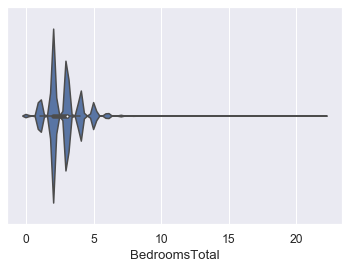

In [268]:
sns.violinplot(master.BedroomsTotal)

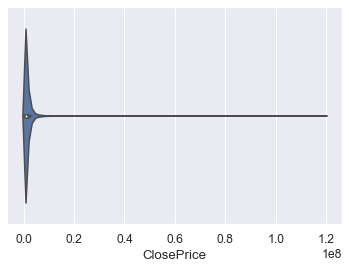

In [269]:
sns.violinplot(master.ClosePrice)

In [270]:
master = master[(master['ClosePrice'] > 400000) & (master['ClosePrice']<20000000) & (master['StoriesTotal']<=4)]
master = master[master['Latitude'] > 0]
master = master[master['YearBuilt'] > 0]
master = master[master['BedroomsTotal'] > 0]
master = master[master['BedroomsTotal'] < 10]
master = master[master['BathroomsTotalInteger'] > 0]
master = master[master['BathroomsTotalInteger'] < 16]
master = master[(master['LotSizeSquareFeet'] < 100000) & (master['LotSizeSquareFeet'] > 0)]
master = master[(master['LivingArea'] < 14000) & (master['LivingArea'] > 0)]

In [271]:
master.shape

(26414, 28)

# Get Dummies
+ Property Type

In [272]:
master.PropertySubType.value_counts()

Single Family Residence    18509
Condominium                 6496
Townhouse                   1385
Duplex                         9
Commercial/Residential         6
Loft                           3
Triplex                        1
Cabin                          1
Manufactured On Land           1
Stock Cooperative              1
Name: PropertySubType, dtype: int64

In [273]:
master.PropertySubType = master.PropertySubType.apply(prop_type_update)
prop_type_df = pd.get_dummies(master.PropertySubType)
master = pd.concat([master,prop_type_df],axis=1)

In [274]:
master = master[['ClosePrice','YearBuilt', 
                'PostalCode','PropertySubType',
                'BedroomsTotal','BathroomsTotalInteger', 
                'Latitude','Longitude','LivingArea','StoriesTotal',
                'LotSizeSquareFeet','CloseDate','CommonWalls',
                'Single Family Residence', 'Condominium','Multi','Townhouse',
                'AppliancesYN','CoolingYN', 'FireplaceYN','HeatingYN',
                'LaundryYN','ParkingYN','PatioYN', 'PoolPrivateYN','ViewYN']]

In [275]:
master.shape

(26414, 26)

## Impute Missing Values

In [276]:
master.head()

,ClosePrice,YearBuilt,PostalCode,PropertySubType,BedroomsTotal,BathroomsTotalInteger,Latitude,Longitude,LivingArea,StoriesTotal,LotSizeSquareFeet,CloseDate,CommonWalls,Single Family Residence,Condominium,Multi,Townhouse,AppliancesYN,CoolingYN,FireplaceYN,HeatingYN,LaundryYN,ParkingYN,PatioYN,PoolPrivateYN,ViewYN
1,1890000.0,1941.0,90405,Single Family Residence,2.0,1.0,34.020163,-118.460235,1265.0,1.0,7814.0,01/24/2018 12:00:00 AM,No Common Walls,1,0,0,0,True,False,True,True,True,True,NaN,False,False
2,720000.0,1964.0,90405,Condominium,1.0,1.0,34.004771,-118.482761,665.0,2.0,7159.0,04/10/2018 12:00:00 AM,NaN,0,1,0,0,True,False,False,True,True,True,NaN,False,True
3,1550000.0,1936.0,90405,Single Family Residence,3.0,2.0,34.019241,-118.464033,1471.0,1.0,6740.0,02/21/2018 12:00:00 AM,No Common Walls,1,0,0,0,True,False,True,True,True,True,True,False,False
4,525000.0,1950.0,90405,Condominium,1.0,1.0,34.026334,-118.452100,627.0,2.0,17862.0,01/11/2018 12:00:00 AM,NaN,0,1,0,0,True,False,False,NaN,True,True,True,False,True
5,1211000.0,1967.0,90405,Condominium,3.0,2.0,34.004162,-118.476180,1130.0,2.0,6416.0,01/24/2018 12:00:00 AM,NaN,0,1,0,0,True,False,False,True,True,True,True,False,True


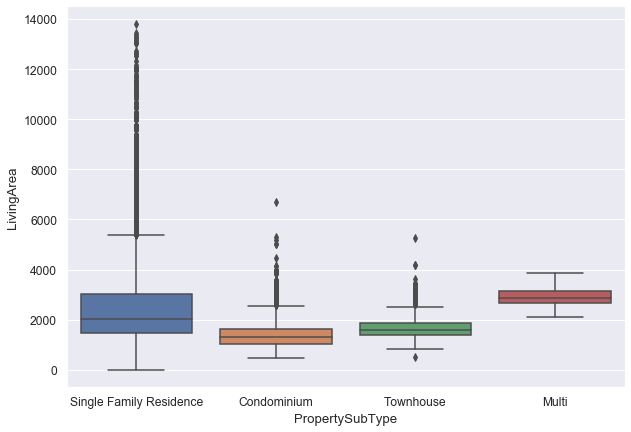

In [277]:
plt.figure(figsize=(10,7))
sns.boxplot(x='PropertySubType', y='LivingArea',data=master)

In [278]:
np.mean(master[master.PropertySubType == 'Condominium']['LivingArea'])

1378.3468225880904

In [279]:
def impute_livingarea(cols):
    LivingArea = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(LivingArea):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['LivingArea'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['LivingArea'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['LivingArea'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['LivingArea'])
    else:
        return LivingArea
    


In [280]:
def impute_LotSizeSquareFeet(cols):
    LotSizeSquareFeet = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(LotSizeSquareFeet):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['LotSizeSquareFeet'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['LotSizeSquareFeet'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['LotSizeSquareFeet'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['LotSizeSquareFeet'])
    else:
        return LotSizeSquareFeet

In [281]:
def impute_YearBuilt(cols):
    YearBuilt = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(YearBuilt):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['YearBuilt'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['YearBuilt'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['YearBuilt'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['YearBuilt'])
    else:
        return YearBuilt

In [282]:
def impute_BathroomsTotalInteger(cols):
    BathroomsTotalInteger = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(BathroomsTotalInteger):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['BathroomsTotalInteger'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['BathroomsTotalInteger'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['BathroomsTotalInteger'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['BathroomsTotalInteger'])
    else:
        return BathroomsTotalInteger
    
def impute_BedroomsTotal(cols):
    BedroomsTotal = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(BedroomsTotal):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['BedroomsTotal'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['BedroomsTotal'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['BedroomsTotal'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['BedroomsTotal'])
    else:
        return BedroomsTotal

In [283]:
master.LivingArea = master[['LivingArea','PropertySubType']].apply(impute_livingarea,axis=1)
master.LotSizeSquareFeet = master[['LotSizeSquareFeet','PropertySubType']].apply(impute_LotSizeSquareFeet,axis=1)
master.YearBuilt = master[['YearBuilt','PropertySubType']].apply(impute_YearBuilt,axis=1)
master.BathroomsTotalInteger = master[['BathroomsTotalInteger','PropertySubType']].apply(impute_BathroomsTotalInteger,axis=1)
master.BedroomsTotal = master[['BedroomsTotal','PropertySubType']].apply(impute_BedroomsTotal,axis=1)

In [284]:
master.StoriesTotal.fillna(1, inplace=True)
master.StoriesTotal.replace(0,1, inplace=True)
# master.LivingArea.fillna(master.LivingArea.mean(), inplace=True)
# master.LivingArea.replace(0,master.LivingArea.mean(), inplace=True)
# master['LotSizeSquareFeet'].fillna(master['LotSizeSquareFeet'].mean(), inplace=True)
# master['LotSizeSquareFeet'].replace(0,master['LotSizeSquareFeet'].mean(), inplace=True)

# master.BathroomsTotalInteger.fillna(master.BathroomsTotalInteger.mean(), inplace=True)
# master.BathroomsTotalInteger.replace(0,master.BathroomsTotalInteger.mean(), inplace=True)

# master.BedroomsTotal.fillna(master.BedroomsTotal.mean(), inplace=True)
# master.BedroomsTotal.replace(0,master.BedroomsTotal.mean(), inplace=True)
# master['YearBuilt'].fillna(master['YearBuilt'].mean(), inplace=True)
# master['YearBuilt'].replace(0,master['YearBuilt'].mean(), inplace=True)

In [285]:
master.CommonWalls = master.CommonWalls.map(wall_clean)

In [286]:
master.CommonWalls.value_counts()

1    15740
0    10674
Name: CommonWalls, dtype: int64

In [287]:
col_list = ['AppliancesYN','CoolingYN', 'FireplaceYN','HeatingYN',
                 'LaundryYN','ParkingYN','PatioYN', 'PoolPrivateYN','CommonWalls','ViewYN'
           ]

impute_features(master, col_list)

In [288]:
master.head()

,ClosePrice,YearBuilt,PostalCode,PropertySubType,BedroomsTotal,BathroomsTotalInteger,Latitude,Longitude,LivingArea,StoriesTotal,LotSizeSquareFeet,CloseDate,CommonWalls,Single Family Residence,Condominium,Multi,Townhouse,AppliancesYN,CoolingYN,FireplaceYN,HeatingYN,LaundryYN,ParkingYN,PatioYN,PoolPrivateYN,ViewYN
1,1890000.0,1941.0,90405,Single Family Residence,2.0,1.0,34.020163,-118.460235,1265.0,1.0,7814.0,01/24/2018 12:00:00 AM,1,1,0,0,0,1,0,1,1,1,1,0,0,0
2,720000.0,1964.0,90405,Condominium,1.0,1.0,34.004771,-118.482761,665.0,2.0,7159.0,04/10/2018 12:00:00 AM,0,0,1,0,0,1,0,0,1,1,1,0,0,1
3,1550000.0,1936.0,90405,Single Family Residence,3.0,2.0,34.019241,-118.464033,1471.0,1.0,6740.0,02/21/2018 12:00:00 AM,1,1,0,0,0,1,0,1,1,1,1,1,0,0
4,525000.0,1950.0,90405,Condominium,1.0,1.0,34.026334,-118.452100,627.0,2.0,17862.0,01/11/2018 12:00:00 AM,0,0,1,0,0,1,0,0,0,1,1,1,0,1
5,1211000.0,1967.0,90405,Condominium,3.0,2.0,34.004162,-118.476180,1130.0,2.0,6416.0,01/24/2018 12:00:00 AM,0,0,1,0,0,1,0,0,1,1,1,1,0,1


In [289]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26414 entries, 1 to 56200
Data columns (total 26 columns):
ClosePrice                 26414 non-null float64
YearBuilt                  26414 non-null float64
PostalCode                 26414 non-null int64
PropertySubType            26414 non-null object
BedroomsTotal              26414 non-null float64
BathroomsTotalInteger      26414 non-null float64
Latitude                   26414 non-null float64
Longitude                  26414 non-null float64
LivingArea                 26414 non-null float64
StoriesTotal               26414 non-null float64
LotSizeSquareFeet          26414 non-null float64
CloseDate                  26413 non-null object
CommonWalls                26414 non-null int64
Single Family Residence    26414 non-null uint8
Condominium                26414 non-null uint8
Multi                      26414 non-null uint8
Townhouse                  26414 non-null uint8
AppliancesYN               26414 non-null int64
Cooling

## Feature Engineering

In [290]:
def WinterIsComing(x):
    if x in [3,4,5,6,7,8]:
        return 0
    else:
        return 1

In [291]:
WinterIsComing(12)

1

In [292]:
master['Age'] = 2020 - master['YearBuilt']
master['CloseMonth']=pd.to_datetime(master.CloseDate).dt.month
master['CloseYear']=pd.to_datetime(master.CloseDate).dt.year
master['WinterIsComing']=master.CloseMonth.apply(WinterIsComing)

In [293]:
master.shape

(26414, 30)

In [294]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26414 entries, 1 to 56200
Data columns (total 30 columns):
ClosePrice                 26414 non-null float64
YearBuilt                  26414 non-null float64
PostalCode                 26414 non-null int64
PropertySubType            26414 non-null object
BedroomsTotal              26414 non-null float64
BathroomsTotalInteger      26414 non-null float64
Latitude                   26414 non-null float64
Longitude                  26414 non-null float64
LivingArea                 26414 non-null float64
StoriesTotal               26414 non-null float64
LotSizeSquareFeet          26414 non-null float64
CloseDate                  26413 non-null object
CommonWalls                26414 non-null int64
Single Family Residence    26414 non-null uint8
Condominium                26414 non-null uint8
Multi                      26414 non-null uint8
Townhouse                  26414 non-null uint8
AppliancesYN               26414 non-null int64
Cooling

In [295]:
master.head()

,ClosePrice,YearBuilt,PostalCode,PropertySubType,BedroomsTotal,BathroomsTotalInteger,Latitude,Longitude,LivingArea,StoriesTotal,LotSizeSquareFeet,CloseDate,CommonWalls,Single Family Residence,Condominium,Multi,Townhouse,AppliancesYN,CoolingYN,FireplaceYN,HeatingYN,LaundryYN,ParkingYN,PatioYN,PoolPrivateYN,ViewYN,Age,CloseMonth,CloseYear,WinterIsComing
1,1890000.0,1941.0,90405,Single Family Residence,2.0,1.0,34.020163,-118.460235,1265.0,1.0,7814.0,01/24/2018 12:00:00 AM,1,1,0,0,0,1,0,1,1,1,1,0,0,0,79.0,1.0,2018.0,1
2,720000.0,1964.0,90405,Condominium,1.0,1.0,34.004771,-118.482761,665.0,2.0,7159.0,04/10/2018 12:00:00 AM,0,0,1,0,0,1,0,0,1,1,1,0,0,1,56.0,4.0,2018.0,0
3,1550000.0,1936.0,90405,Single Family Residence,3.0,2.0,34.019241,-118.464033,1471.0,1.0,6740.0,02/21/2018 12:00:00 AM,1,1,0,0,0,1,0,1,1,1,1,1,0,0,84.0,2.0,2018.0,1
4,525000.0,1950.0,90405,Condominium,1.0,1.0,34.026334,-118.452100,627.0,2.0,17862.0,01/11/2018 12:00:00 AM,0,0,1,0,0,1,0,0,0,1,1,1,0,1,70.0,1.0,2018.0,1
5,1211000.0,1967.0,90405,Condominium,3.0,2.0,34.004162,-118.476180,1130.0,2.0,6416.0,01/24/2018 12:00:00 AM,0,0,1,0,0,1,0,0,1,1,1,1,0,1,53.0,1.0,2018.0,1


## Remove Old Sale Data

In [296]:
master=master[master['CloseYear']>2015]

In [297]:
master.ClosePrice.shape

(21705,)

In [298]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21705 entries, 1 to 56200
Data columns (total 30 columns):
ClosePrice                 21705 non-null float64
YearBuilt                  21705 non-null float64
PostalCode                 21705 non-null int64
PropertySubType            21705 non-null object
BedroomsTotal              21705 non-null float64
BathroomsTotalInteger      21705 non-null float64
Latitude                   21705 non-null float64
Longitude                  21705 non-null float64
LivingArea                 21705 non-null float64
StoriesTotal               21705 non-null float64
LotSizeSquareFeet          21705 non-null float64
CloseDate                  21705 non-null object
CommonWalls                21705 non-null int64
Single Family Residence    21705 non-null uint8
Condominium                21705 non-null uint8
Multi                      21705 non-null uint8
Townhouse                  21705 non-null uint8
AppliancesYN               21705 non-null int64
Cooling

In [299]:
master.Age.sample(20)

33124      5.0
55052     94.0
47788     60.0
39112     59.0
47484     92.0
42007     65.0
43847     70.0
39464     53.0
6058      50.0
39547     48.0
23465     61.0
23316     29.0
47932     35.0
28210     15.0
14853     73.0
38841     78.0
53692    109.0
45871     47.0
46618     93.0
30678     69.0
Name: Age, dtype: float64

In [300]:
master.shape

(21705, 30)

## Add 10 Year Bond Market Price

In [306]:
def impute_bondprice(cols):
    Bond10Year = cols[0]
    CloseYear = cols[1]
    if pd.isnull(Bond10Year):
        if CloseYear == 2016:
            return np.mean(master[master.CloseYear == 2016]['Bond10Year'])
        elif CloseYear == 2017:
            return np.mean(master[master.CloseYear == 2017]['Bond10Year'])
        elif CloseYear == 2018:
            return np.mean(master[master.CloseYear == 2018]['Bond10Year'])
        else:
            return np.mean(master[master.CloseYear == 2019]['Bond10Year'])
    else:
        return Bond10Year

In [307]:
master['BondDate']=pd.to_datetime(master.CloseDate).dt.date
master['BondDate'] = master['BondDate'].apply(lambda x: (x - datetime.timedelta(1*365/12)))

In [308]:
bond_prices = pd.read_csv('DGS10.csv')
bond_prices.DGS10 = bond_prices.DGS10.replace('.','1.77')
bond_dic = dict(zip(bond_prices.DATE, bond_prices.DGS10))
master['Bond10Year'] = pd.to_datetime(master.BondDate).astype(str)
master['Bond10Year'] = master['Bond10Year'].map(bond_dic)
master['Bond10Year'] = master['Bond10Year'].apply(float)
# master['Bond10Year'] = master['Bond10Year'].fillna(np.mean(master.Bond10Year))
master.Bond10Year = master[['Bond10Year','CloseYear']].apply(impute_bondprice,axis=1)

In [309]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21705 entries, 1 to 56200
Data columns (total 32 columns):
ClosePrice                 21705 non-null float64
YearBuilt                  21705 non-null float64
PostalCode                 21705 non-null int64
PropertySubType            21705 non-null object
BedroomsTotal              21705 non-null float64
BathroomsTotalInteger      21705 non-null float64
Latitude                   21705 non-null float64
Longitude                  21705 non-null float64
LivingArea                 21705 non-null float64
StoriesTotal               21705 non-null float64
LotSizeSquareFeet          21705 non-null float64
CloseDate                  21705 non-null object
CommonWalls                21705 non-null int64
Single Family Residence    21705 non-null uint8
Condominium                21705 non-null uint8
Multi                      21705 non-null uint8
Townhouse                  21705 non-null uint8
AppliancesYN               21705 non-null int64
Cooling

In [310]:
master.describe()

,ClosePrice,YearBuilt,PostalCode,BedroomsTotal,BathroomsTotalInteger,Latitude,Longitude,LivingArea,StoriesTotal,LotSizeSquareFeet,CommonWalls,Single Family Residence,Condominium,Multi,Townhouse,AppliancesYN,CoolingYN,FireplaceYN,HeatingYN,LaundryYN,ParkingYN,PatioYN,PoolPrivateYN,ViewYN,Age,CloseMonth,CloseYear,WinterIsComing,Bond10Year
count,2.170500e+04,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000
mean,1.844580e+06,1963.339691,90114.799816,3.020871,2.912555,34.050314,-118.403035,2172.603548,1.664686,14500.300290,0.582677,0.697627,0.253398,0.000461,0.048514,0.839576,0.675973,0.762681,0.953513,0.927021,0.887584,0.380281,0.234324,0.528311,56.660309,6.481226,2017.405390,0.405206,2.303949
std,1.711124e+06,30.374192,116.585110,1.167772,1.492456,0.047026,0.065722,1380.109799,0.873747,16574.254462,0.493129,0.459296,0.434967,0.021460,0.214855,0.367007,0.468021,0.425449,0.210542,0.260107,0.315885,0.485467,0.423585,0.499209,30.374192,3.090154,1.078259,0.490943,0.437846
min,4.010000e+05,1887.000000,90019.000000,1.000000,1.000000,33.929297,-118.574561,1.000000,1.000000,697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,1.370000
25%,9.250000e+05,1940.000000,90039.000000,2.000000,2.000000,34.014612,-118.447519,1310.000000,1.000000,5838.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,32.000000,4.000000,2016.000000,0.000000,1.870000
50%,1.350000e+06,1958.000000,90064.000000,3.000000,3.000000,34.052383,-118.407885,1764.000000,1.000000,7492.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,62.000000,6.000000,2017.000000,0.000000,2.296689
75%,2.091050e+06,1988.000000,90210.000000,4.000000,3.000000,34.089764,-118.365125,2603.000000,2.000000,15401.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000,9.000000,2018.000000,1.000000,2.710000
max,1.985000e+07,2019.000000,90405.000000,9.000000,15.000000,34.138444,-118.179776,13820.000000,4.000000,99725.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,12.000000,2019.000000,1.000000,3.220000


In [311]:
master.columns

Index(['ClosePrice', 'YearBuilt', 'PostalCode', 'PropertySubType',
       'BedroomsTotal', 'BathroomsTotalInteger', 'Latitude', 'Longitude',
       'LivingArea', 'StoriesTotal', 'LotSizeSquareFeet', 'CloseDate',
       'CommonWalls', 'Single Family Residence', 'Condominium', 'Multi',
       'Townhouse', 'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN',
       'LaundryYN', 'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'ViewYN', 'Age',
       'CloseMonth', 'CloseYear', 'WinterIsComing', 'BondDate', 'Bond10Year'],
      dtype='object')

# EDA

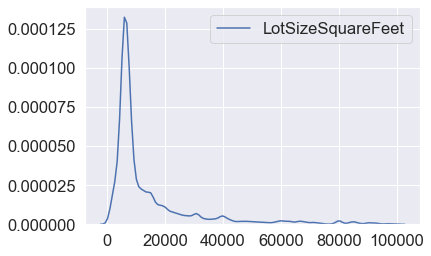

In [225]:
sns.kdeplot(master.LotSizeSquareFeet)

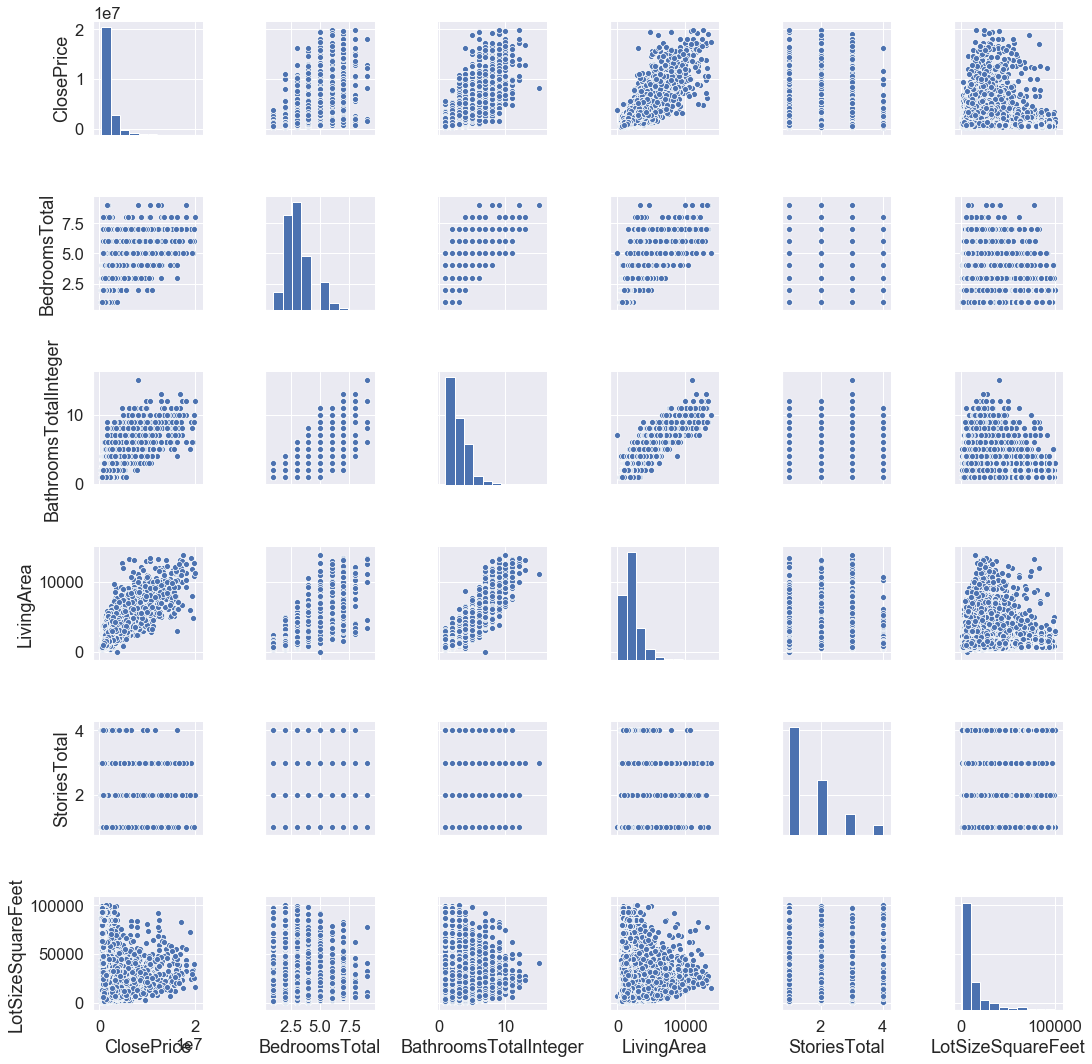

In [226]:
sns.pairplot(master[['ClosePrice', 
'BedroomsTotal', 'BathroomsTotalInteger','LivingArea', 'StoriesTotal','LotSizeSquareFeet'
]])


# 'ClosePrice',

# 'BedroomsTotal', 'BathroomsTotalInteger','LivingArea', 'StoriesTotal','LotSizeSquareFeet'

# 'YearBuilt','CloseDate','Age','CloseMonth','CloseYear','Bond10Year', 'WinterIsComing'

# 'Latitude', 'Longitude', 

# 'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN', 'LaundryYN',
# 'ParkingYN', 'PatioYN','CommonWalls','PoolPrivateYN',

# 'Single Family Residence', 'Condominium', 'Townhouse', 'Multi'
 

In [227]:
sorted(master.ClosePrice,reverse=True)

[19850000.0,
 19715787.0,
 19660000.0,
 19500000.0,
 19375000.0,
 19250000.0,
 19000000.0,
 18800000.0,
 18100000.0,
 18000000.0,
 18000000.0,
 18000000.0,
 17990000.0,
 17500000.0,
 17285000.0,
 17250000.0,
 17150000.0,
 17126000.0,
 17086000.0,
 17000000.0,
 16780000.0,
 16700000.0,
 16550000.0,
 16515000.0,
 16475000.0,
 16335000.0,
 16300000.0,
 16300000.0,
 16200000.0,
 16200000.0,
 16162500.0,
 16100000.0,
 16000000.0,
 16000000.0,
 16000000.0,
 16000000.0,
 15940000.0,
 15800000.0,
 15750000.0,
 15750000.0,
 15700000.0,
 15600000.0,
 15550000.0,
 15500000.0,
 15500000.0,
 15500000.0,
 15450000.0,
 15300000.0,
 15275000.0,
 15210000.0,
 15025000.0,
 15000000.0,
 15000000.0,
 15000000.0,
 15000000.0,
 14900000.0,
 14812500.0,
 14750000.0,
 14675000.0,
 14600000.0,
 14600000.0,
 14500000.0,
 14450000.0,
 14300000.0,
 14200000.0,
 14140000.0,
 14000000.0,
 14000000.0,
 13850000.0,
 13776750.0,
 13700000.0,
 13650000.0,
 13500000.0,
 13450000.0,
 13419063.0,
 13400000.0,
 13325000.0,

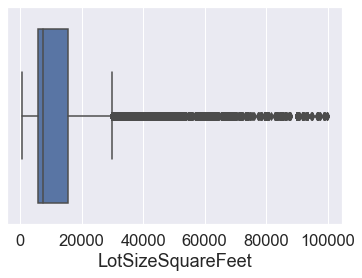

In [228]:
sns.boxplot(master['LotSizeSquareFeet'])

Check Distribution of price. Roughly between 1-2 Million Dollars.

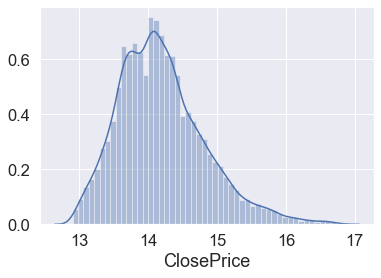

In [229]:
sns.distplot((np.log(master['ClosePrice'])))

## Compute the pairwise correlation

In [230]:
master.columns

Index(['ClosePrice', 'YearBuilt', 'PostalCode', 'PropertySubType',
       'BedroomsTotal', 'BathroomsTotalInteger', 'Latitude', 'Longitude',
       'LivingArea', 'StoriesTotal', 'LotSizeSquareFeet', 'CloseDate',
       'CommonWalls', 'Single Family Residence', 'Condominium', 'Multi',
       'Townhouse', 'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN',
       'LaundryYN', 'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'ViewYN', 'Age',
       'CloseMonth', 'CloseYear', 'WinterIsComing', 'BondDate', 'Bond10Year'],
      dtype='object')

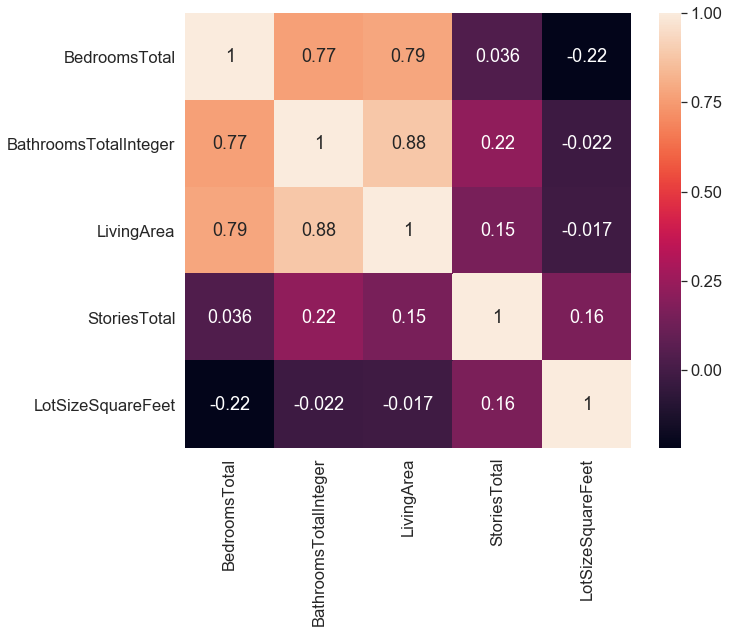

In [231]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(master[[
'BedroomsTotal', 'BathroomsTotalInteger','LivingArea', 'StoriesTotal','LotSizeSquareFeet'
]].corr(),annot=True)

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

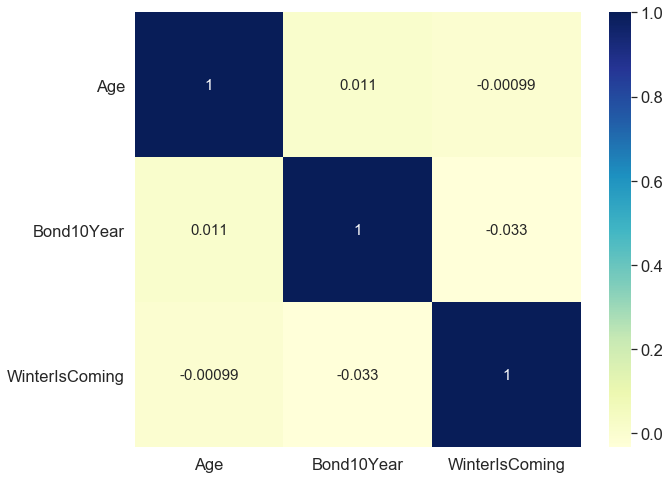

In [232]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(master[[
'CloseDate','Age','Bond10Year','WinterIsComing'
]].corr(),annot=True,cmap="YlGnBu",annot_kws={"size": 15})
sns.set(font_scale=1.5)
plt.xticks(rotation=0)
plt.yticks(rotation = 0)

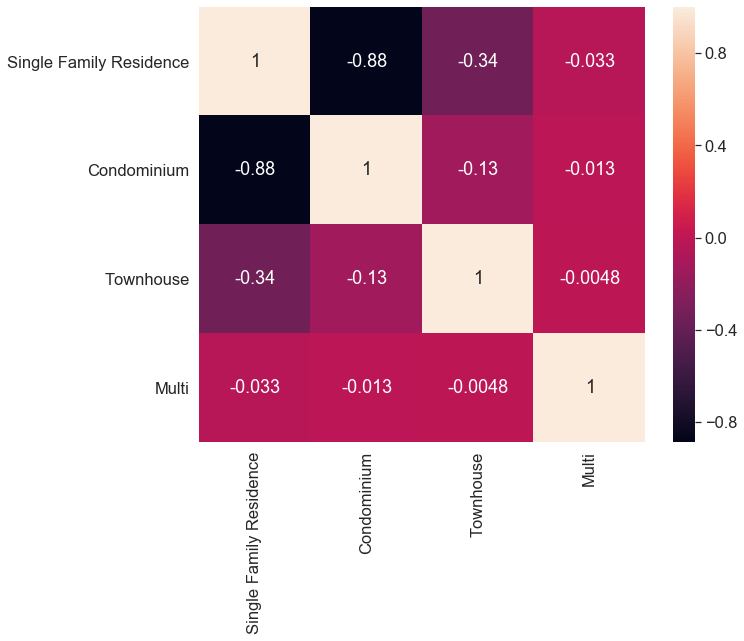

In [233]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(master[[
'Single Family Residence', 'Condominium', 'Townhouse', 'Multi'
]].corr(),annot=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

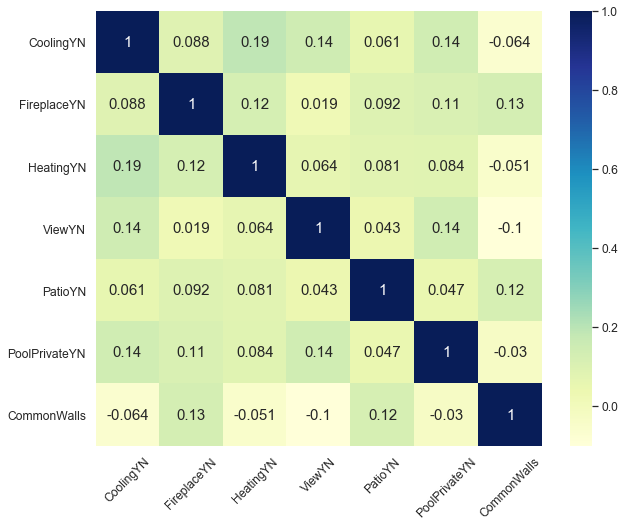

In [259]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.1)
sns.heatmap(master[['CoolingYN', 'FireplaceYN','HeatingYN','ViewYN',
                'PatioYN', 'PoolPrivateYN','CommonWalls']].corr(),annot=True,cmap="YlGnBu",annot_kws={"size": 15})

plt.yticks(rotation = 0)
plt.xticks(rotation=45)

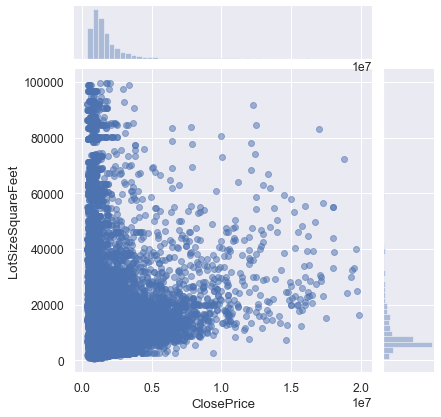

In [235]:
sns.jointplot(data=master, x='ClosePrice' , y = 'LotSizeSquareFeet', kind='scatter',alpha=.5)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


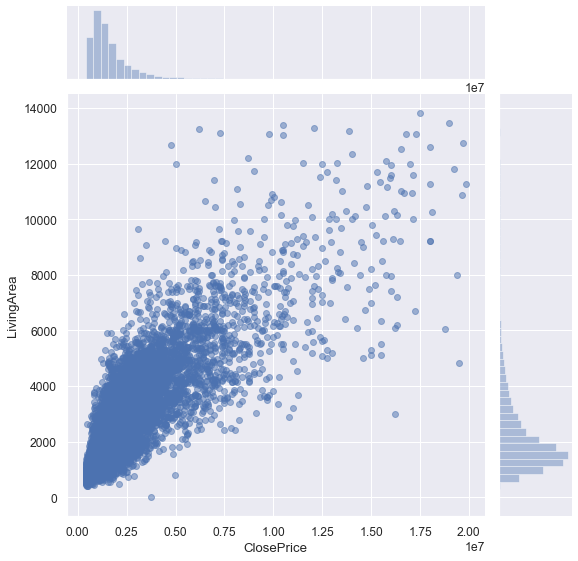

In [236]:
sns.jointplot(x=(master.ClosePrice) , y = master.LivingArea, kind='scatter',alpha=.5, size=8)

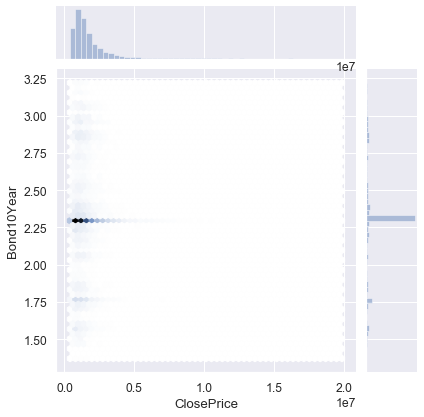

In [237]:
# Bond10Year
sns.jointplot(data=master, x='ClosePrice' , y = 'Bond10Year', kind='hex')

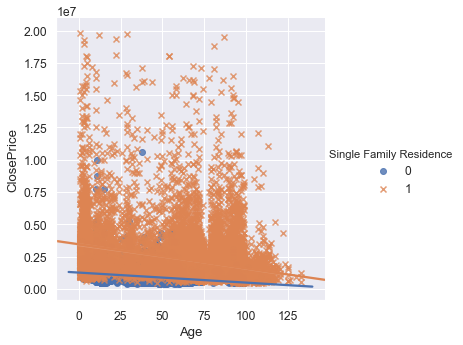

In [238]:
sns.lmplot(data=master, x='Age', y = 'ClosePrice', 
           hue = 'Single Family Residence', markers=["o", "x"]);

In [239]:
master.describe()

,ClosePrice,YearBuilt,PostalCode,BedroomsTotal,BathroomsTotalInteger,Latitude,Longitude,LivingArea,StoriesTotal,LotSizeSquareFeet,CommonWalls,Single Family Residence,Condominium,Multi,Townhouse,AppliancesYN,CoolingYN,FireplaceYN,HeatingYN,LaundryYN,ParkingYN,PatioYN,PoolPrivateYN,ViewYN,Age,CloseMonth,CloseYear,WinterIsComing,Bond10Year
count,2.170500e+04,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000,21705.000000
mean,1.844580e+06,1963.339691,90114.799816,3.020871,2.912555,34.050314,-118.403035,2172.603548,1.664686,14500.300290,0.582677,0.697627,0.253398,0.000461,0.048514,0.839576,0.675973,0.762681,0.953513,0.927021,0.887584,0.380281,0.234324,0.528311,56.660309,6.481226,2017.405390,0.405206,2.301920
std,1.711124e+06,30.374192,116.585110,1.167772,1.492456,0.047026,0.065722,1380.109799,0.873747,16574.254462,0.493129,0.459296,0.434967,0.021460,0.214855,0.367007,0.468021,0.425449,0.210542,0.260107,0.315885,0.485467,0.423585,0.499209,30.374192,3.090154,1.078259,0.490943,0.380484
min,4.010000e+05,1887.000000,90019.000000,1.000000,1.000000,33.929297,-118.574561,1.000000,1.000000,697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,1.370000
25%,9.250000e+05,1940.000000,90039.000000,2.000000,2.000000,34.014612,-118.447519,1310.000000,1.000000,5838.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,32.000000,4.000000,2016.000000,0.000000,2.180000
50%,1.350000e+06,1958.000000,90064.000000,3.000000,3.000000,34.052383,-118.407885,1764.000000,1.000000,7492.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,62.000000,6.000000,2017.000000,0.000000,2.301920
75%,2.091050e+06,1988.000000,90210.000000,4.000000,3.000000,34.089764,-118.365125,2603.000000,2.000000,15401.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000,9.000000,2018.000000,1.000000,2.420000
max,1.985000e+07,2019.000000,90405.000000,9.000000,15.000000,34.138444,-118.179776,13820.000000,4.000000,99725.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,12.000000,2019.000000,1.000000,3.220000


look for good linear fit, there is little error

/Users/esotewic/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


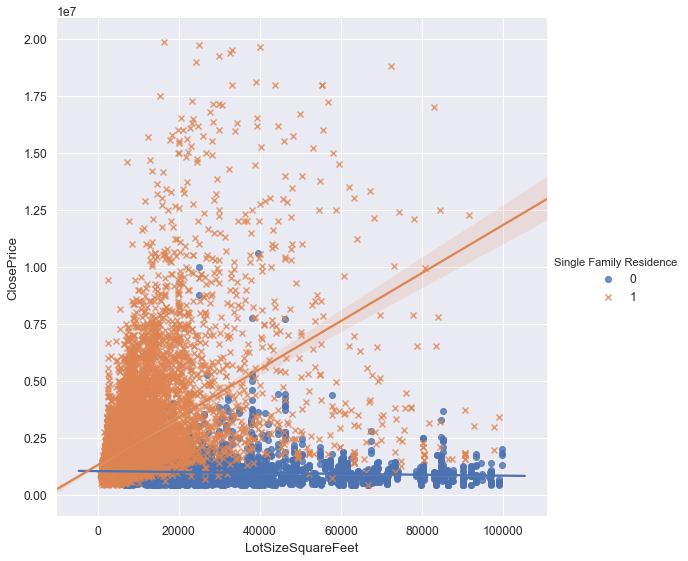

In [261]:


sns.lmplot(data=master, x='LotSizeSquareFeet', y = 'ClosePrice', 
           hue = 'Single Family Residence', markers=["o", "x"], size = 8);

In [241]:
master.LotSizeSquareFeet.describe()

count    21705.000000
mean     14500.300290
std      16574.254462
min        697.000000
25%       5838.000000
50%       7492.000000
75%      15401.000000
max      99725.000000
Name: LotSizeSquareFeet, dtype: float64

In [242]:
master['ClosePrice'].describe()

count    2.170500e+04
mean     1.844580e+06
std      1.711124e+06
min      4.010000e+05
25%      9.250000e+05
50%      1.350000e+06
75%      2.091050e+06
max      1.985000e+07
Name: ClosePrice, dtype: float64

In [243]:
master.columns

Index(['ClosePrice', 'YearBuilt', 'PostalCode', 'PropertySubType',
       'BedroomsTotal', 'BathroomsTotalInteger', 'Latitude', 'Longitude',
       'LivingArea', 'StoriesTotal', 'LotSizeSquareFeet', 'CloseDate',
       'CommonWalls', 'Single Family Residence', 'Condominium', 'Multi',
       'Townhouse', 'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN',
       'LaundryYN', 'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'ViewYN', 'Age',
       'CloseMonth', 'CloseYear', 'WinterIsComing', 'BondDate', 'Bond10Year'],
      dtype='object')

# Modeling

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [245]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [246]:
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import textwrap # for wrapping answer descriptions
# from individual_soln import * # use functions from individual_soln.py

## Train Test Split

In [312]:
models = master

In [313]:
y = models['ClosePrice']
X = models[[
            'Single Family Residence', 'Condominium','Townhouse','Multi',
            'BedroomsTotal','BathroomsTotalInteger'
            ,'Latitude','Longitude',
            'LotSizeSquareFeet','LivingArea','StoriesTotal'
            
            
            ,'Bond10Year','WinterIsComing','Age',
            
            'CoolingYN', 'FireplaceYN','HeatingYN','PatioYN',
            'PoolPrivateYN','CommonWalls','ViewYN'
           ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

In [314]:
X_train.head()

,Single Family Residence,Condominium,Townhouse,Multi,BedroomsTotal,BathroomsTotalInteger,Latitude,Longitude,LotSizeSquareFeet,LivingArea,StoriesTotal,Bond10Year,WinterIsComing,Age,CoolingYN,FireplaceYN,HeatingYN,PatioYN,PoolPrivateYN,CommonWalls,ViewYN
46255,1,0,0,0,3.0,3.0,34.054502,-118.357796,5501.0,1930.0,1.0,1.880000,0,90.0,1,1,1,0,0,1,0
33507,1,0,0,0,5.0,5.0,34.052103,-118.521177,7803.0,3757.0,2.0,1.470000,1,40.0,0,1,1,0,1,0,1
54861,1,0,0,0,2.0,3.0,34.095483,-118.393857,5993.0,1599.0,2.0,2.296689,1,94.0,1,1,1,0,0,1,1
23895,1,0,0,0,4.0,5.0,33.993123,-118.467728,5233.0,4500.0,2.0,1.795730,1,5.0,1,0,1,1,0,1,1
23782,0,1,0,0,2.0,2.0,33.984466,-118.469273,6639.0,979.0,1.0,2.340000,0,47.0,0,1,1,0,0,0,1


## Standard Scaler
+ select features
+ all features

In [315]:
scale_df = X[['Age','Latitude','Longitude','LotSizeSquareFeet','LivingArea']]
scaler = StandardScaler()
scaler.fit(scale_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [316]:

X_scaled = scaler.transform(scale_df)
df_scaled = pd.DataFrame(X_scaled, columns = scale_df.columns)
no_scale = X[['Single Family Residence', 'Condominium','Multi',
       'Townhouse','StoriesTotal', 'Bond10Year',
       'CoolingYN', 'FireplaceYN', 'HeatingYN', 'PatioYN', 'PoolPrivateYN',
        'WinterIsComing','ViewYN',
       'CommonWalls']]

In [317]:
no_scale.reset_index(drop=True,inplace=True)

In [318]:
X = df_scaled.join(no_scale,how='outer')


In [319]:

y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)


### All Features

In [320]:
# scale_df = X
# scaler = StandardScaler()
# scaler.fit(scale_df)
# X_scaled = scaler.transform(scale_df)
# df_scaled = pd.DataFrame(X_scaled, columns = scale_df.columns)
# y = np.log(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)


# Linear Regression

In [321]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print(lm.intercept_)
print(metrics.explained_variance_score(y_test,predictions)) #R2 score
df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff']) #Coefficients DF

13.624947189126166
0.803499060955823


In [324]:
df.sort_values('Coeff',ascending=False).head()

,Coeff
LivingArea,0.388489
Single Family Residence,0.305683
HeatingYN,0.111250
PoolPrivateYN,0.075258
Bond10Year,0.068509


In [325]:
pd.Series(lm.coef_).sort_values()

2    -0.170373
7    -0.168356
6    -0.119816
8    -0.017511
16   -0.015705
3    -0.011446
9    -0.006673
18    0.007960
0     0.010127
14    0.034012
17    0.038489
1     0.047710
11    0.056136
12    0.057738
10    0.068509
15    0.075258
13    0.111250
5     0.305683
4     0.388489
dtype: float64

### Loss Functions

In [326]:
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

0.20921841376328415
0.07882335936171835
0.28075498100963114


### Predictions

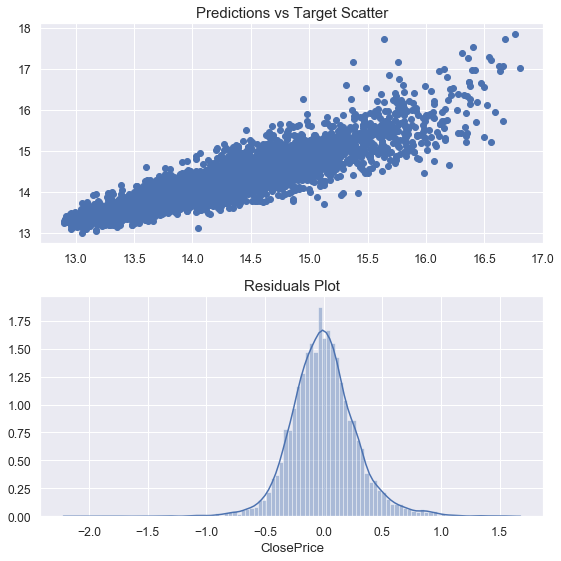

In [327]:
fig, axs = plt.subplots(2,1,figsize=(8,8))
axs[0].scatter(y_test,predictions)
axs[0].set_title('Predictions vs Target Scatter', size=15)
axs[1]=sns.distplot(y_test-predictions, bins = 100)
axs[1].set_title('Residuals Plot', size=15)
plt.tight_layout()

Normally Distributed Residuals means model was a correct choice


In [328]:
X_train.Age[:7867].shape

(7867,)

In [329]:
(y_test-predictions).shape

(6512,)

In [330]:
X_train.columns

Index(['Age', 'Latitude', 'Longitude', 'LotSizeSquareFeet', 'LivingArea',
       'Single Family Residence', 'Condominium', 'Multi', 'Townhouse',
       'StoriesTotal', 'Bond10Year', 'CoolingYN', 'FireplaceYN', 'HeatingYN',
       'PatioYN', 'PoolPrivateYN', 'WinterIsComing', 'ViewYN', 'CommonWalls'],
      dtype='object')

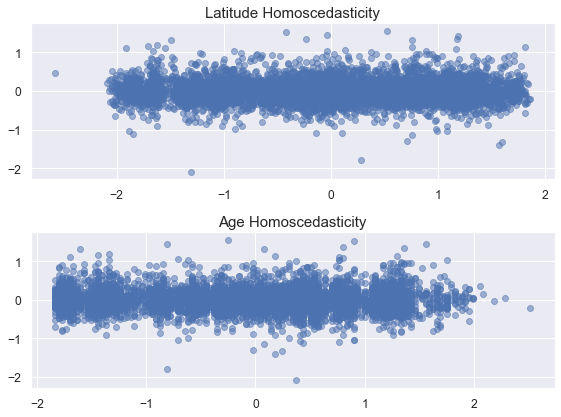

In [338]:
fig, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].scatter(X_train.Latitude[:len(y_test-predictions)],y_test-predictions,alpha=.5)
axs[0].set_title('Latitude Homoscedasticity', size=15)
axs[1].scatter(X_train.Age[:len(y_test-predictions)],y_test-predictions,alpha=.5)
axs[1].set_title('Age Homoscedasticity', size=15)
plt.tight_layout()

The assumptions are linearity, linear independence, homoscedasticity, and normal distribution of errors. 
Not all of these are needed, only linearity but it may make a difference when they are violated. 

# Ridge Regression & Lasso

In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [122]:
ridge_r = Ridge(alpha=0.1)
ridge_r.fit(X_train, y_train)
ridge_pred = ridge_r.predict(X_test)
print(ridge_r.score(X_test,y_test))
print(mean_squared_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

0.8026637351601013
0.07915598068753298
0.281346726811479


In [124]:
# lasso = Lasso()
# lasso.fit(X_train,y_train)
# lasso_pred = lasso.predict(X_test)
# lasso.score(y_test,lasso_pred)

In [131]:
y = models['ClosePrice']
X = models[['PostalCode', 'BedroomsTotal',
       'BathroomsTotalInteger', 'Latitude', 'Longitude', 'LivingArea',
       'StoriesTotal', 'LotSizeSquareFeet', 'CommonWalls',
       'Single Family Residence', 'Condominium', 'Multi', 'Townhouse',
       'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN', 'LaundryYN',
       'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'Age', 'CloseMonth',
       'CloseYear', 'WinterIsComing', 'Bond10Year'
           ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

# Random Forest Regressor Model

In [132]:
rfr = RandomForestRegressor(n_estimators=100, max_features=3, bootstrap=True, max_depth= 110,
                           min_samples_leaf=3,min_samples_split=8)
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_test)

print(rfr.score(X_test,y_test)) 
print(rfr.feature_importances_) #Feature Importances
print(r2_score(y_test,rfr_predictions))

0.8376417611278881
[4.33565520e-02 1.03696372e-01 1.67476129e-01 3.30867153e-02
 5.63399670e-02 3.04243705e-01 9.17892371e-03 7.43783266e-02
 1.09185004e-02 3.14801551e-02 2.68274469e-02 1.62559135e-05
 1.94665284e-03 2.62855685e-03 3.79028187e-03 1.14302073e-02
 7.40328089e-04 7.61311948e-04 1.10966206e-03 3.39623823e-03
 5.48186723e-02 3.21541497e-02 8.04911350e-03 5.74476561e-03
 2.22415462e-03 1.02068559e-02]
0.8376417611278881


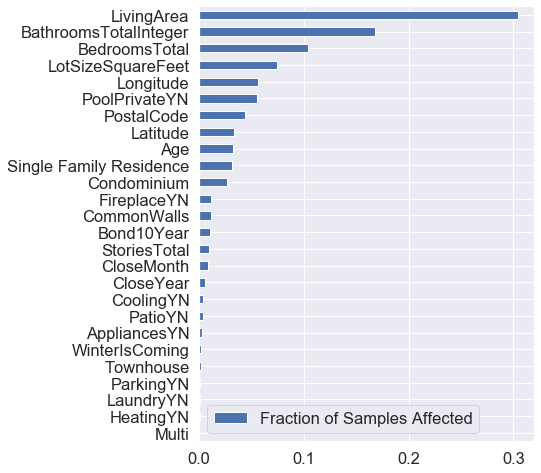

In [155]:

feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rfr.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')

feat_scores.plot(kind='barh', figsize =(6,8))

## Grid Search

In [1893]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]
}

In [1894]:
rf = RandomForestRegressor()

In [1895]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [1896]:
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [1586]:
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 12.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [1897]:
print('Best Params:')
print(grid_search.best_params_)
print('Best CV Score:')
print(grid_search.best_score_)

Best Params:
{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Best CV Score:
0.8031087388339937


In [1898]:
grid_search_predict = grid_search.predict(X_test)
print(r2_score(y_test, grid_search_predict))

0.793239760532856


# Gradient Boosting

In [157]:
GBR = GradientBoostingRegressor(learning_rate=0.05, 
                                n_estimators=2000,
                                max_features=15,
                                max_depth=5,
                                subsample=1)

GBR.fit(X_train, y_train)
GBR_predict = GBR.predict(X_test)

print(r2_score(y_test, GBR_predict))
print(GBR.score(X_test,y_test))

0.877051189060672
0.877051189060672


In [158]:
GBR.feature_importances_

array([2.72135002e-02, 3.26914856e-02, 1.74088024e-01, 4.69542023e-02,
       6.07484646e-02, 5.12071508e-01, 2.91632252e-03, 7.55712239e-02,
       9.07755527e-04, 1.90166809e-02, 1.47402684e-03, 7.36074392e-07,
       4.10477526e-05, 7.02458349e-04, 7.20034888e-04, 1.50410985e-04,
       4.27962556e-04, 1.04268889e-04, 4.60436863e-04, 1.34228296e-03,
       7.58187379e-03, 2.34131287e-02, 3.02859217e-03, 2.87746363e-03,
       2.79590748e-04, 5.21651751e-03])

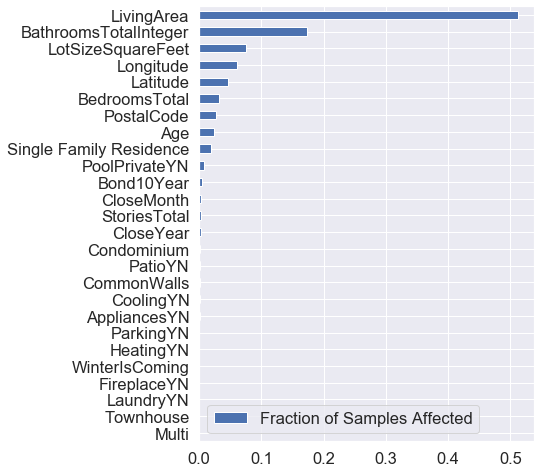

In [159]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : GBR.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(6,8))

## Grid Search

In [1795]:
param_grid = {
'n_estimators': [2000],
'max_features': [15],
'max_depth': [5],
'learning_rate': [.05],
'subsample': [1]
}
classifier = GridSearchCV(estimator=GBR, cv=10, param_grid=param_grid, n_jobs=1)


In [1796]:
classifier.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.05,
                                                 loss='ls', max_depth=5,
                                                 max_features=15,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=2000,
                                                 n_iter_no_change=None,
               

In [1797]:
print('Best Params:')
print(classifier.best_params_)
print('Best CV Score:')
print(classifier.best_score_)

Best Params:
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 15, 'n_estimators': 2000, 'subsample': 1}
Best CV Score:
0.8669756949824985


In [1798]:
classifier_predict = classifier.predict(X_test)
print(r2_score(y_test, classifier_predict))

0.850668490405543


In [1322]:
classifier.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.15,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=2000,
                                                 n_iter_no_change=None,
             

In [1329]:
print('Best Params:')
print(classifier.best_params_)
print('Best CV Score:')
print(classifier.best_score_)

Best Params:
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 15, 'n_estimators': 2000, 'subsample': 1}
Best CV Score:
0.9268982371752508


# XGBOOST

In [196]:
import xgboost as xgb

In [1778]:
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [1779]:
model.fit(X_train,y_train)
predict=model.predict(X_test)

model.score(X_test,y_test)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8364207927893771